## EE 123 Lab 0 - Basic Python and DTFT <br> <small> January 21st, 2016 </small>

### General iPython Notebook usage instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `shift-enter`
- To add a new cell, either select `"Insert->Insert New Cell Below"` or type `b` key after select a cell
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `"File->Save and Checkpoint"` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell` or type `z` key
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

### Basic Python Questions:

To complete this part of the lab, you will need to read and run the python tutorial posted on the class website.

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `"Insert->Insert New Cell Below"` or type `b` key after select a cell

__Q0.__ What do you add after a function to get the help window?

__A0.__`?`

__Q1.__ What do you have to import to make all division a real division?

__A1.__ `__future__`

__Q2.__ What are the standard abbreviations for `numpy` and `matplotlib.pyplot` ?

__A2.__`np` and `plt`

__Q3.__ What is the output of the following commands?

    x = np.array([1,2,3,4,5,6])
    y = x[0:4]
    y[0] = 7
    print(x)

__A3.__ `[7 2 3 4 5 6]`

__Q4.__ Write a code that prints `[5 4 3 2 1 0 1 2 3 4]`.

In [1]:
# A4. Your code here:
import numpy as np
print(abs(np.r_[-5:5]))

[5 4 3 2 1 0 1 2 3 4]


__Q5.__ Write a code that prints out an array of every other integer from 0 to 4

In [2]:
# A5. Your code here:
print(np.r_[0:5:2])

[0 2 4]


__Q6.__ Generate the same plot as in the following figure inline:
    
<img style="float: left;" src="./tutorial_plot.jpg">


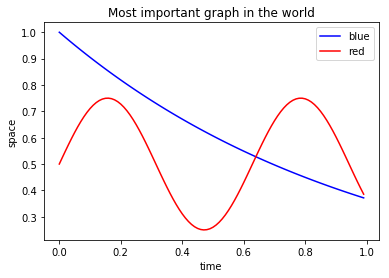

In [3]:
# A6. 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.r_[:1:0.01] # if you don't specify a number before the colon, the starting index defaults to 0
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5

# Your plotting code here:
plt.figure()
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'r')

plt.xlabel("time")
plt.ylabel("space")
plt.title("Most important graph in the world")
plt.legend(("blue", "red"))


### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [4]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

In [5]:
N = 5
t = np.r_[-N:N+1]
a = np.ones(N)
np.meshgrid?

### Solution for (a):

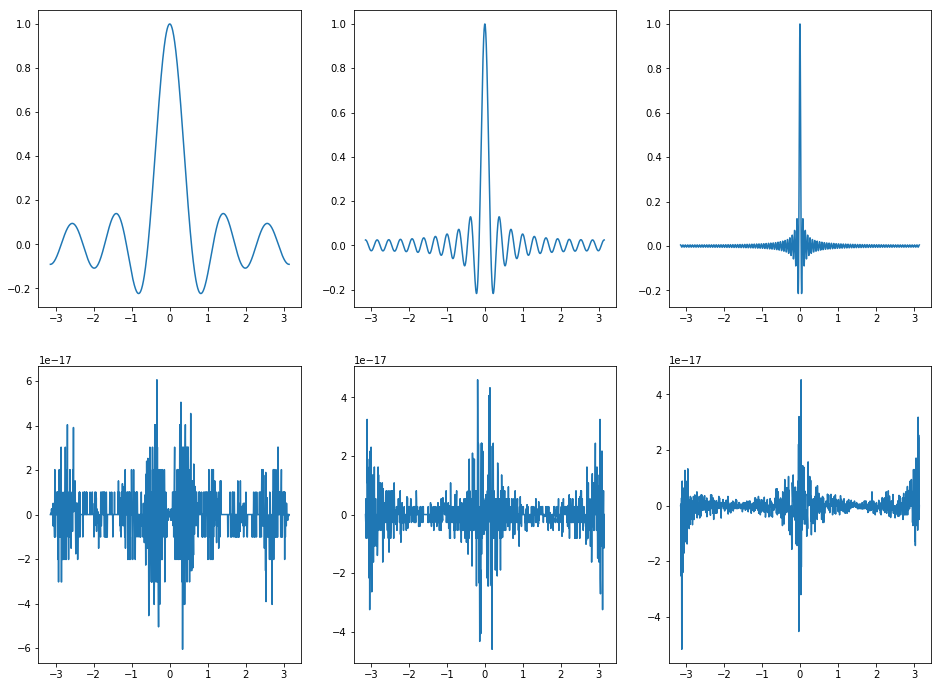

In [11]:
    #repeat for N = 5, 20, 100
    i=1
    plt.figure(figsize=(16,12))
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N : N+1]
        # create window function (w) using np.ones
        w = np.ones([1,2*N + 1])
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi, np.pi, 1025)
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n ,omega= np.meshgrid(NN, Omega)

        # create DTFT matrix 
        index = np.multiply(n, omega) # element-wise operation
        DTFT = np.exp(-1j*index)
        
        # evaluate DTFT
        W = np.dot(DTFT,w.T)  # for dot operation you have to keep the dimension correct
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        normBase = 1/W[512]
        W = W*normBase
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.subplot(2,3,i)
        plt.plot(Omega, W.real)
        plt.subplot(2,3,3+i)
        plt.plot(Omega, W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        i+=1
        

Describe the effect of increasing $N$ on the DTFT:


----
$N$ is the size of window. The DTFT becomes more narrow and slender as N grows.


### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

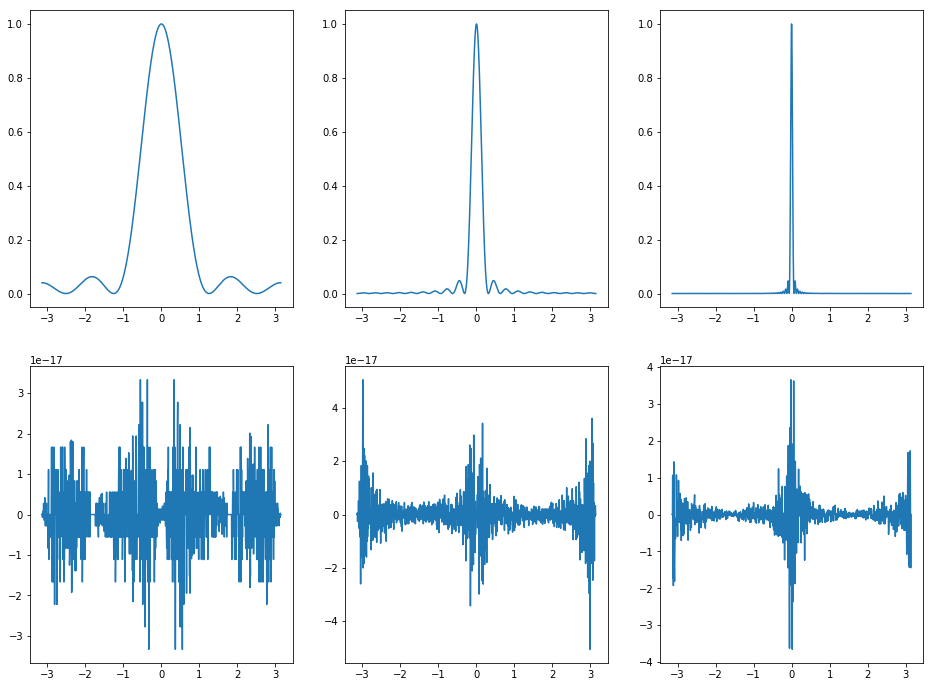

In [7]:
    #repeat for N = 5, 20, 100
    i = 1
    plt.figure(figsize=(16,12))
    for N in [5, 20, 100]:  
        
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN_b = np.r_[-N : N+1]
        # create window function (w) 
        triList = [1-abs(n)/N for n in range(-N, N+1)]
#         print(triList)
        w_b = np.array(triList) # w_b.shape= [2n+1.]
#         print(w)
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega_b = np.linspace(-np.pi, np.pi, 1025)
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n_b ,omega_b= np.meshgrid(NN_b, Omega_b)

        # create DTFT matrix 
        DTFT_b = np.exp(-1j*np.multiply(n_b, omega_b))
        
        # evaluate DTFT
        W_b = np.dot(DTFT_b, w_b)
        
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        normBase = 1/W_b[512]
        W_b = W_b*normBase

        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.subplot(2,3,i)
        plt.plot(Omega_b, abs(W_b.real))
        plt.subplot(2,3,3+i)
        plt.plot(Omega_b, W_b.imag)
        
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        
        i+=1

Describe the effect of increasing $N$ on the DTFT:

The same argument as the previous question holds for this case as well. Larger N indicates slower change happens in the real space. This will then result in higher low-frequency component of the signal. 
----

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

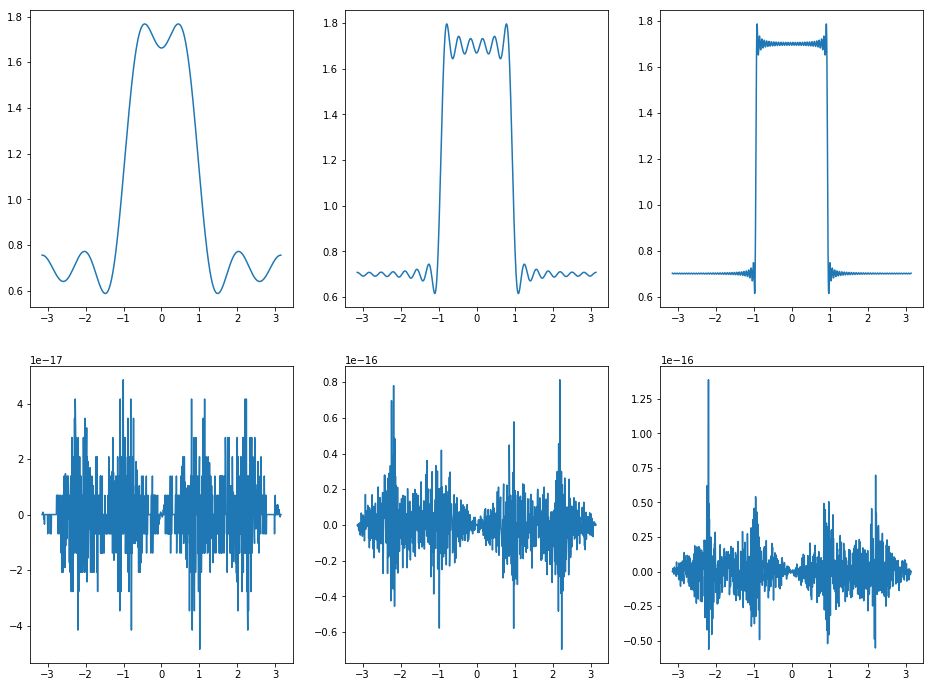

In [33]:
    import math
    i = 1
    plt.figure(figsize=(16,12))
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        NN_c1 = np.r_[-N : N+1]
        # create window function (w) 
        win = np.ones([1,2*N + 1])
#         print(win.shape)
        
        # impulse response of low-pass filter
        hList1_1 = [math.sin(0.3 * np.pi * n)/(np.pi * n) for n in range(-N, 0)]
        hList1_1.append(1)
        hList1_2 = [math.sin(0.3 * np.pi * n)/(np.pi * n) for n in range(1, N+1)]
        hList1 = hList1_1+hList1_2
#         print(hList1)
        h1 = np.array(hList1)
#         print(h1.shape)
        ht1 = np.multiply(h1, win)
#         print(ht1.shape)
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega_c1 = np.linspace(-np.pi, np.pi, 1025)

        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n_c1 ,omega_c1= np.meshgrid(NN_c1, Omega_c1)

        # create DTFT matrix 
        index = np.multiply(n_c1, omega_c1) # element-wise operation
        DTFT_c1 = np.exp(-1j*index)
        
        # evaluate DTFT
        W_c1 = np.dot(DTFT_c1, ht1.T)
        
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        normBase = 1/W_c1[512]
        W_b = W_b * normBase
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.subplot(2,3,i)
        plt.plot(Omega_c1, W_c1.real)
        plt.subplot(2,3,3+i)
        plt.plot(Omega_c1, W_c1.imag)

        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        i+=1
        

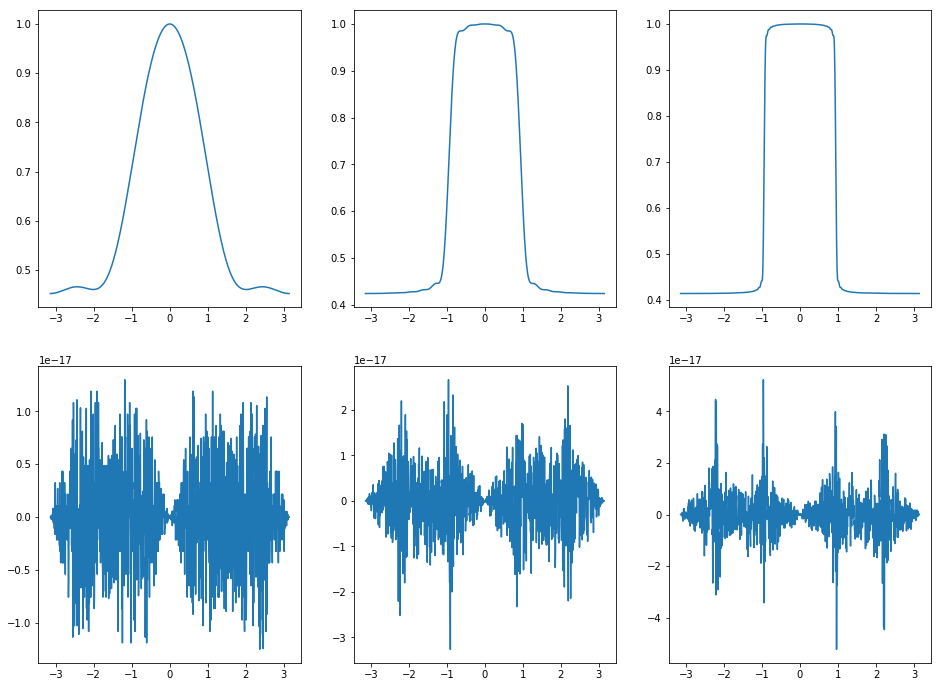

In [36]:
    
    i = 1
    plt.figure(figsize=(16,12))
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN_c2 = np.r_[-N : N+1]

        # create window function (w) 
        triList = [1-abs(n)/N for n in range(-N, N+1)]
        triWin = np.array(triList)

        hList2_1 = [math.sin(0.3 * np.pi * n)/(np.pi * n) for n in range(-N, 0)]
        hList2_1.append(1)
        hList2_2 = [math.sin(0.3 * np.pi * n)/(np.pi * n) for n in range(1, N+1)]
        hList2 = hList2_1 + hList2_2
        h2 = np.array(hList2)
#         print(h2.shape)
#         print(hList2)
        ht2 = np.multiply(h2, triWin)
#         print(ht2.shape)
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega_c2 = np.linspace(-np.pi, np.pi, 1025)

        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n_c2 ,omega_c2= np.meshgrid(NN_c2, Omega_c2)

        # create DTFT matrix 
        index = np.multiply(n_c2, omega_c2) # element-wise operation
#         print(index)
        DTFT_c2 = np.exp(-1j*index)
        
        
        # evaluate DTFT
        W_c2 = np.dot(DTFT_c2, ht2)

        
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        normBase = 1/W_c2[512]
        W_c2 = W_c2 * normBase
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.subplot(2,3,i)
        plt.plot(Omega_c2, W_c2.real)
        plt.subplot(2,3,3+i)
        plt.plot(Omega_c2, W_c2.imag)

        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        i+=1
        

Explain the difference:

____

In [19]:
np.sin?